# <u>hospitality-data-insights-and-cancellation-prediction</u>

[GitHub Link](https://github.com/ajitmane36/hospitality-data-insights-and-cancellation-prediction-model.git) 

#### Problem Statement

- Analyse the data to find trends, customer behaviour, and factors influencing cancellation for the hospitality industry. The goal is to build a predictive model that forecasts cancellations and provides insight into a given dataset.

In [173]:
# Import dependancies
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

#### Dataset

In [175]:
# Load dataset
df=pd.read_csv(r"C:\Users\ajitm\Data Science Cources\Deep Learning Projects\hospitality-data-insights-and-cancellation-prediction-model\hotel_bookings.csv")
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [176]:
# shape
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset has 119390 rows and 32 columns.


In [177]:
# Columns
print(f'Column names: {df.columns}')
print(f"{'--'*50} \n Dataset has {len(df.columns)} columns")

Column names: Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
---------------------------------------------------------------------------------------------------- 
 Dataset has 32 columns


In [178]:
# Dataset basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- Feature children, country, agent and company has nulls.

In [180]:
# Duplicates
print(f"Dataset has {df.duplicated().sum()} duplicates.")
# remove duplicates
df.drop_duplicates(inplace=True)
print(f"{'--'*50} \n SHape of dataset after prforming drop duplicates: {df.shape}")

Dataset has 31994 duplicates.
---------------------------------------------------------------------------------------------------- 
 SHape of dataset after prforming drop duplicates: (87396, 32)


In [181]:
# Handle nulls
null_df=pd.DataFrame({'column':df.columns, 'null_count':df.isna().sum(), '%_null':round(((df.isna().sum()/len(df))*100),4)}).set_index('column')
null_df

,null_count,%_null
column,,
hotel,0,0.0000
is_canceled,0,0.0000
lead_time,0,0.0000
arrival_date_year,0,0.0000
arrival_date_month,0,0.0000
arrival_date_week_number,0,0.0000
arrival_date_day_of_month,0,0.0000
stays_in_weekend_nights,0,0.0000
stays_in_week_nights,0,0.0000


- Feature children, country, agent and company has nulls.

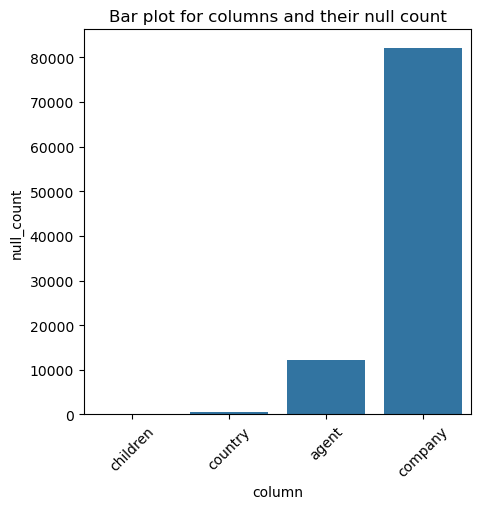

In [183]:
# Visualize Nulls
plt.figure(figsize=(5,5))
ax = sns.barplot(x='column', y='null_count', data=null_df[null_df['null_count'] > 0])
ax.set_title('Bar plot for columns and their null count')
plt.xticks(rotation=45)
plt.show()

In [184]:
# Identify columns with null values
null_clo = df.columns[df.isnull().any()].tolist()

for col in null_clo:
    print(f"{'--'*50} \n {df[col].value_counts()}")

---------------------------------------------------------------------------------------------------- 
 children
0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------- 
 country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64
---------------------------------------------------------------------------------------------------- 
 agent
9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: count, Length: 333, dtype: int64
---------------------------------------------------------------------------------------------------- 
 company
40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
        ..

In [185]:
## Replace nulls

# company feature have 93% null so remove this column
df.drop(columns='company', inplace=True)
# Replce children, country and agent feature with its mode
for col in ['children', 'country','agent']:
    df.fillna(df[col].mode()[0], inplace=True)

In [199]:
# Verify nulls
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 